# The Lotka-Volterra model
This model is a python translation of the LV_pz model proposed in Glover et al. (2011), Sec. 9.3

You will need to make sure the required modules below are installed in your python environment

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

This is the function containing the right hand side of the ODE system

In [3]:
def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2) # change in prey over time = prey population growth - predation (predator pop x prey pop (encounter) x predation efficieny)
    dX2dt = X2 * (p3*p2*X1 - p4) # change in predators over time = predator population growth (assimilation efficiency x predation) - predator mortality 
    return np.array([dX1dt,dX2dt]) 

## Parameters and initial conditions

In [4]:
# The parameters
p = np.array([0.1,0.4,0.2,0.05]) # p1 = prey growth rate, p2 = predation efficiency, p3 = assimilation, p4 = predator mortality
X1_0 = 0.8 # prey population
X2_0 = 0.171 # predator population 
x0 = np.array([X1_0,X2_0])

## Time axis

In [5]:
# time units are days
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart,Tend,step)

## Integration using the scipy ODE solver

In [6]:
# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,)) 

## Plot Fig. 9.3a

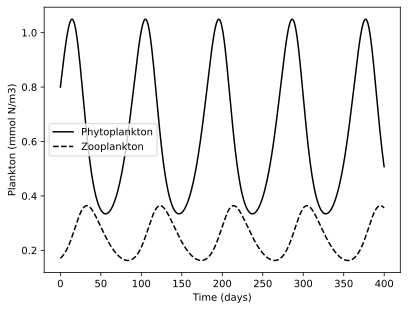

In [9]:
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'svg'

# Exercise 3
1. Write the code to plot Fig. 9.3b, the trajectory in the phase space

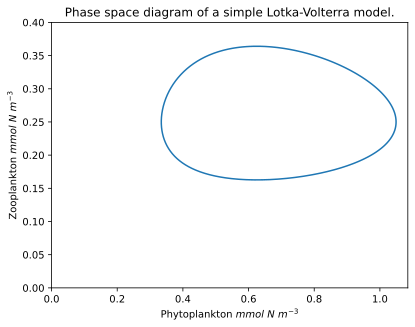

In [17]:
# plot zooplankton (y) against phytoplankton (x) 

plt.plot(y[:,0],y[:,1])
plt.xticks(np.arange(0,1.2, step = 0.2))
plt.xlabel(r'Phytoplankton $mmol\ N\ m^{-3}$')
plt.yticks(np.arange(0, 0.45, step=0.05))
plt.ylabel(r'Zooplankton $mmol\ N\ m^{-3}$')
plt.title('Phase space diagram of a simple Lotka-Volterra model.')
%config InlineBackend.figure_format = 'svg'

2. Set the parameter p3=1 and compare how different the trajectory is in the phase space

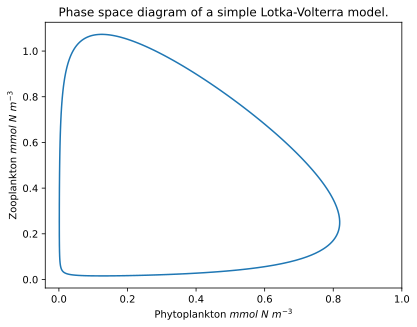

In [26]:
# The parameters
p = np.array([0.1,0.4,1.0,0.05]) # p1 = prey growth rate, p2 = predation efficiency, p3 = assimilation, p4 = predator mortalityX1_0 = 0.8 # prey population
X2_0 = 0.171 # predator population 
x0 = np.array([X1_0,X2_0])

# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,)) 

# plot zooplankton (y) against phytoplankton (x) 

plt.plot(y[:,0],y[:,1])
plt.xticks(np.arange(0,1.2, step = 0.2))
plt.xlabel(r'Phytoplankton $mmol\ N\ m^{-3}$')
plt.yticks(np.arange(0,1.2, step = 0.2))
plt.ylabel(r'Zooplankton $mmol\ N\ m^{-3}$')
plt.title('Phase space diagram of a simple Lotka-Volterra model.')
%config InlineBackend.figure_format = 'svg'

Changing p3 to one means that you are giving the predators 100 % assimilation of their catch. Both populations are unstable and reset by a crash to near zero when predators drrastically overtake prey due to their assimilation efficieny. Initially the prey population is high, but the predators bring them down very quickly and grow equally fast. The only thing limiting the predators is their predation success (p2). 

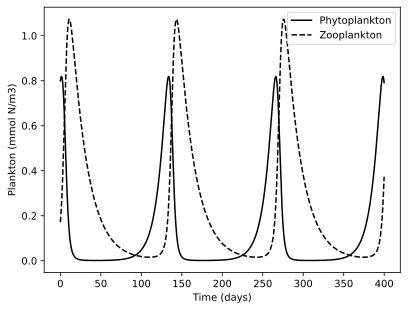

In [27]:
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'svg'

3. Write the code to compute the solution of the L-V model using the initial conditions given in the caption of Fig. 9.4

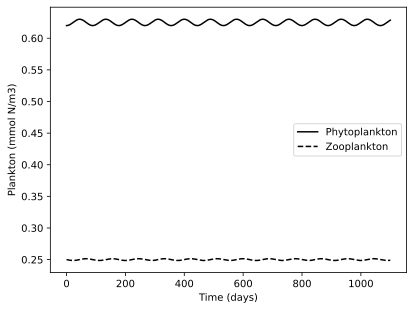

In [28]:
# The parameters
p = np.array([0.1,0.4,0.2,0.05]) # p1 = prey growth rate, p2 = predation efficiency, p3 = assimilation, p4 = predator mortality
X1_0 = 0.62 # prey population
X2_0 = 0.25 # predator population 
x0 = np.array([X1_0,X2_0])

# time units are days
Tstart = 0.
Tend = 1100.
step = 0.1
t = np.arange(Tstart,Tend,step)

# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,)) 

plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'svg'

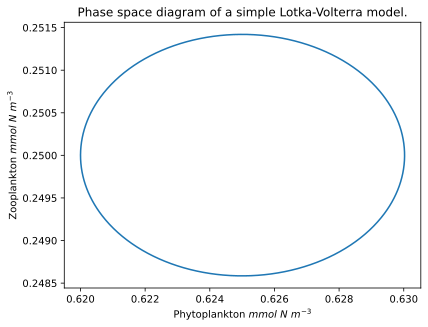

In [30]:
# plot zooplankton (y) against phytoplankton (x) 

plt.plot(y[:,0],y[:,1])
#plt.xticks(np.arange(0,1.2, step = 0.2))
plt.xlabel(r'Phytoplankton $mmol\ N\ m^{-3}$')
#plt.yticks(np.arange(0,1.2, step = 0.2))
plt.ylabel(r'Zooplankton $mmol\ N\ m^{-3}$')
plt.title('Phase space diagram of a simple Lotka-Volterra model.')
%config InlineBackend.figure_format = 'svg'

4. Do you get the same results? Why not? See the errata in the document Glover_etal_2011_ERRATA.pdf to understand more {no need to fully understand the stability analysis ;)}

I don't understand why their population is so unstable, it looks as if there is some perturbation that keeps growing as time passes. If the parameters remain the same, and the predators are not very efficient the system should be relatively stable. If in our case, initially, there are more prey than predators and the difference between the populations is small, then the oscilations should be small too, and the system should be very stable. This is what we observe. Something must have gone wrong in their calcualtions. After reading the errata I am a bit lost but udnerstand that a rounding error due to a display format option in MATLAB. If this option is enabled, error accumulates and throws off the oscilations, in this case postively which makes them larger over time.  